## ROC Curves

They summarize the trade-off between the **true positive rate** and **false positive rate** for a predictive model using different probability thresholds.

$$
\text{True Positive Rate (Sensitivity)} = \frac{\text{True Positives}}{(\text{True Positives + False Negatives})}
$$

$$
\text{False Positive Rate} = \frac{\text{False Positives}}{(\text{False Positives + True Negatives})}
$$

## Precision-Recall Curves

They summarize the trade-off between the **true positive** rate and the **positive predictive value for a predictive model** using different probability thresholds.

ROC curves are appropriate when the observations are **balanced** between each class, whereas precision-recall curves are appropriate for **imbalanced** datasets.

AUC - area under curve - used as a summary of the model skill

- Smaller values on the x-axis of the plot indicate lower false pasitives and higher true negatives.

- Larger values on the y-axis of the plot indicate true positives and lower false negatives

A model with perfect skill is represented at a point (0, 1).

In [22]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

In [23]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
ns_probs = [0 for _ in range(len(testy))] # no skill prediction (majority clas)

In [24]:
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

LogisticRegression()

In [25]:
lr_probs = model.predict_proba(testX)


In [26]:
lr_probs[:10]

array([[0.00402732, 0.99597268],
       [0.00200516, 0.99799484],
       [0.99470117, 0.00529883],
       [0.84762581, 0.15237419],
       [0.00166665, 0.99833335],
       [0.49993855, 0.50006145],
       [0.98023686, 0.01976314],
       [0.97653662, 0.02346338],
       [0.0179993 , 0.9820007 ],
       [0.29353482, 0.70646518]])

In [27]:
lr_probs = lr_probs[:, 1] #keep probabilities for the positive outcome only

In [29]:
lr_probs[:10]

array([0.99597268, 0.99799484, 0.00529883, 0.15237419, 0.99833335,
       0.50006145, 0.01976314, 0.02346338, 0.9820007 , 0.70646518])

In [7]:
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)

In [8]:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903


In [9]:
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)

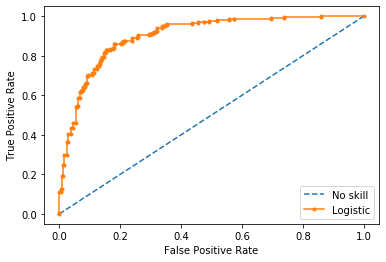

In [12]:
plt.plot(ns_fpr, ns_tpr, linestyle='--', label="No skill")
plt.plot(lr_fpr, lr_tpr, marker='.', label="Logistic")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

## When to use ROC vs Precision-Call Curves?

- ROC curves should be used when there are roughly equal numbers of observations for each class.
- Precision-Recall curves should be used when there is a moderate to large class imbalance.

## Precision-Call Curve

In [15]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score, auc

yhat = model.predict(testX)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
lr_f1 = f1_score(testy, yhat)
lr_auc = auc(lr_recall, lr_precision)

In [16]:
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

Logistic: f1=0.841 auc=0.898


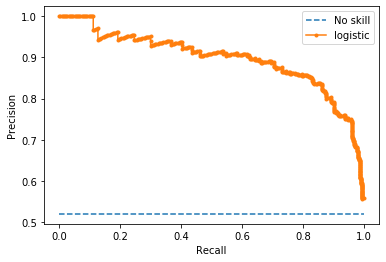

In [18]:
no_skill = len(testy[testy==1]) / len(testy) 

plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No skill')
plt.plot(lr_recall, lr_precision, marker='.', label='logistic')

plt.xlabel("Recall")
plt.ylabel("Precision")

plt.legend()
plt.show()

$$
\text{Positive Predictive Power(Precision)} = \frac{\text{True Positives}}{(\text{True Positives + False Positives})}
$$

$$
\text{Recall (Sensitivity)} = \frac{True Positives}{(\text{True Positives + False Negatives})}
$$

Reviewing both preciion and recall is useful in cases where there is an imbalance in the observations between the two classes. **Specifically, there are many examples of no event (class 0) and only a few examples of an event (class 1).**

A preciion-recall curve is a plot of the precision (y-axis) and the recall (x-axis) for different thresholds, much like the ROC curve.

A no skill classifier is one that cannot dicriminate between the classes and would predict a random class or a constant in all cases.

The no-skill line changes based on the distribution of the positive to negative classes.

It is a horizontal line with the value of the ratio of positive cases in the dataset. For a balaced dataset this is 0.5.

A model with perfect skill is deciped as a point at (1, 1).

A skillfull model is represented by a curve that bows towards (1, 1) above the flat line of no skill.

There are also composite scores that attempt to summarize the precision and recall; two examples include:

- F-Measure or F1 score - calculates the harmonic mean of the precision and recall

- Are Under Curve - summarizes only the integral or an approximation of the area under the precision-recall curve.

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/